In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch.nn.functional as F

In [2]:
model = models.efficientnet_b3()

num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 101)

In [3]:
model.load_state_dict(torch.load('Efficient NetB3_Adam.pth'))
model.eval()

C:\Users\pc\AppData\Local\Temp\ipykernel_18620\2903406640.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('Efficient NetB3_Adam.pth'))


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
            (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [4]:
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [5]:
data_dir = 'C:/Users/pc/Desktop/Inference'

In [6]:
def preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img_tensor = data_transforms(img)
    return img_tensor.unsqueeze(0)

In [7]:
image_paths = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir) if fname.endswith(('.jpg', '.png'))]
images = torch.cat([preprocess_image(img_path) for img_path in image_paths])

In [8]:
with torch.no_grad():
    outputs = model(images)
    probabilities = F.softmax(outputs, dim=1)
    _, predicted_classes = torch.max(outputs, 1)

In [9]:
predicted_classes = predicted_classes.detach().numpy()
probabilities = probabilities.detach().numpy()
class_names = {
    0: 'apple_pie',
    1: 'baby_back_ribs',
    2: 'baklava',
    3: 'beef_carpaccio',
    4: 'beef_tartare',
    5: 'beet_salad',
    6: 'beignets',
    7: 'bibimbap',
    8: 'bread_pudding',
    9: 'breakfast_burrito',10: 'bruschetta',11: 'caesar_salad',12: 'cannoli',
    13: 'caprese_salad',14: 'carrot_cake',15: 'ceviche',16: 'cheesecake',17: 'cheese_plate',18: 'chicken_curry',19: 'chicken_quesadilla',20: 'chicken_wings',21: 'chocolate_cake',22: 'chocolate_mousse',
    23: 'churros',24: 'clam_chowder',25: 'club_sandwich',26: 'crab_cakes',27: 'creme_brulee',28: 'croque_madame',29: 'cup_cakes',30: 'deviled_eggs',31: 'donuts',32: 'dumplings',
    33: 'edamame',34: 'eggs_benedict',35: 'escargots',36: 'falafel',37: 'filet_mignon',38: 'fish_and_chips',39: 'foie_gras',40: 'french_fries',41: 'french_onion_soup',
    42: 'french_toast',43: 'fried_calamari',44: 'fried_rice',45: 'frozen_yogurt',46: 'garlic_bread',47: 'gnocchi',48: 'greek_salad', 49: 'grilled_cheese_sandwich',
    50: 'grilled_salmon',51: 'guacamole',52: 'gyoza',53: 'hamburger',54: 'hot_and_sour_soup',55: 'hot_dog',56: 'huevos_rancheros',57: 'hummus',58: 'ice_cream',59: 'lasagna',60: 'lobster_bisque',
    61: 'lobster_roll_sandwich',62: 'macaroni_and_cheese',63: 'macarons',64: 'miso_soup',65: 'mussels',66: 'nachos',67: 'omelette',68: 'onion_rings',69: 'oysters',70: 'pad_thai',71: 'paella',72: 'pancakes',73: 'panna_cotta',74: 'peking_duck',
    75: 'pho',76: 'pizza',77: 'pork_chop',78: 'poutine',79: 'prime_rib',80: 'pulled_pork_sandwich',81: 'ramen',82: 'ravioli',83: 'red_velvet_cake',84: 'risotto',85: 'samosa',86: 'sashimi',87: 'scallops',
    88: 'seaweed_salad',89: 'shrimp_and_grits',90: 'spaghetti_bolognese',91: 'spaghetti_carbonara',92: 'spring_rolls',93: 'steak',94: 'strawberry_shortcake',95: 'sushi',96: 'tacos',97: 'takoyaki',98: 'tiramisu',99: 'tuna_tartare',100: 'waffles'
}

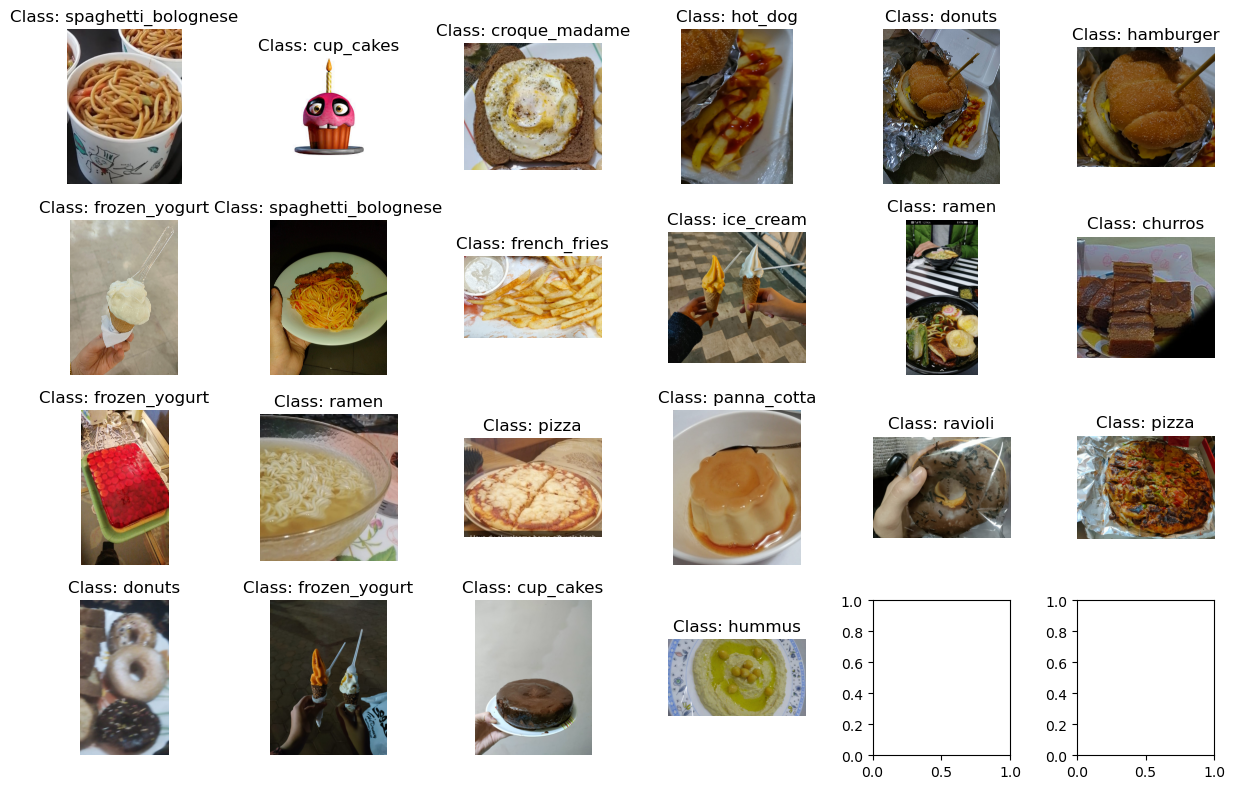

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8))
axes = axes.flatten()

for i, (image_path, predicted_class, probability) in enumerate(zip(image_paths, predicted_classes, probabilities)):
    img = mpimg.imread(image_path)
    confidence_scores = [f"{class_names[j]}: {probability[j] * 100:.2f}%" for j in range(len(class_names))]
    confidence_text = "\n".join(confidence_scores)
    
    axes[i].imshow(img)
    axes[i].set_title(f"Class: {class_names[predicted_class]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()